In [1]:
import os
os.chdir(os.pardir)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

import vapor
from vapor.models import Cambium

2020-08-24 12:30:02,084 [MainThread  ] [INFO ]  Starting log for vapor...


In [2]:
# --- Load Regional Best ---
results = pd.read_pickle(os.path.join('results','bnef_results.pkl'))


In [3]:
Viz = vapor.Visualizer(results=results, aggregate_region='pca', region_label_pct=0.7)

In [4]:
df = Viz.gdf.copy()
list(df.columns)

['region',
 'geometry_x',
 'project_id',
 'project_name',
 'tech',
 'structure',
 'country',
 'power_region',
 'state',
 'developer',
 'offtaker',
 'ppa_estimated_signing_year',
 'term',
 're_capacity_mw',
 'batt_capacity_mw',
 'batt_capacity_mwh',
 'ppa_estimated_last_year',
 'geocoder_lookup',
 'lon_lat_tuple',
 'longitude',
 'latitude',
 'geometry_y',
 'index_right',
 'resource_point',
 'resource_fp',
 'adjusted_installed_cost',
 'analysis_period_irr',
 'cash_for_debt_service',
 'cbi_fedtax_total',
 'cbi_statax_total',
 'cbi_total',
 'cbi_total_fed',
 'cbi_total_oth',
 'cbi_total_sta',
 'cbi_total_uti',
 'cf_length',
 'cost_debt_upfront',
 'cost_financing',
 'cost_installed',
 'cost_installedperwatt',
 'cost_prefinancing',
 'debt_fraction',
 'depr_alloc_custom',
 'depr_alloc_macrs_15',
 'depr_alloc_macrs_5',
 'depr_alloc_none',
 'depr_alloc_none_percent',
 'depr_alloc_sl_15',
 'depr_alloc_sl_20',
 'depr_alloc_sl_39',
 'depr_alloc_sl_5',
 'depr_alloc_total',
 'depr_fedbas_after_itc_c

array(['cambium_capacity_value', 'cambium_total_value',
       'cambium_as_value', 'cambium_policy_value', 'cambium_grid_value',
       'cambium_busbar_energy_value', 'cambium_co2_rate_avg'],
      dtype=object)

In [39]:
years = [str(i) for i in range(2020,2051,1)]
cambium_cols = [i for i in df.columns if 'cambium' in i]
cambium_cols = [i for i in cambium_cols if i[-4:] in years]

# --- subset cambium columns ---
c_df = df[cambium_cols + ['project_id','tech','region','system_capacity']]

# --- melt ---
c_df = c_df.melt(id_vars=['project_id','tech','region','system_capacity'])
c_df['year'] = [int(i[-4:]) for i in c_df['variable']]
c_df['variable'] = [str(i[:-5]) for i in c_df['variable']]


c_df.loc[c_df['variable'] == 'cambium_grid_value']

,project_id,tech,region,system_capacity,variable,value,year
1520,35986,pv,p10,1500.0,cambium_grid_value,70.445681,2020
1521,10000037,wind,p103,114500.0,cambium_grid_value,9985.506931,2020
1522,87387,pv,p11,3300.0,cambium_grid_value,188.294963,2020
1523,52792,pv,p122,3400.0,cambium_grid_value,182.365057,2020
1524,31535,pv,p122,1100.0,cambium_grid_value,57.439856,2020
...,...,...,...,...,...,...,...
3315,71690,pv,p9,2200.0,cambium_grid_value,NaN,2043
3316,63582,wind,p9,1500.0,cambium_grid_value,NaN,2043
3317,26927,pv,p9,1000.0,cambium_grid_value,NaN,2043
3318,156501,pv,p94,54100.0,cambium_grid_value,NaN,2043


,project_id,tech,region,variable,value,year
380,35986,pv,p10,cambium_total_value,70.477802,2020
381,10000037,wind,p103,cambium_total_value,10005.628021,2020
382,87387,pv,p11,cambium_total_value,188.387049,2020
383,52792,pv,p122,cambium_total_value,182.690860,2020
384,31535,pv,p122,cambium_total_value,57.545003,2020
...,...,...,...,...,...,...
3255,71690,pv,p9,cambium_total_value,NaN,2043
3256,63582,wind,p9,cambium_total_value,NaN,2043
3257,26927,pv,p9,cambium_total_value,NaN,2043
3258,156501,pv,p94,cambium_total_value,NaN,2043


<AxesSubplot:xlabel='year', ylabel='value'>

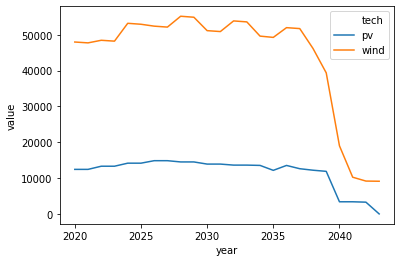

In [40]:
# --- plot ---
g_df = c_df.groupby(['year','variable','tech'], as_index=False)['value'].sum()
g_df = g_df.loc[g_df['variable'] == 'cambium_total_value']
sns.lineplot(x='year', y='value', hue='tech', data=g_df)


KeyError: 'scenario'

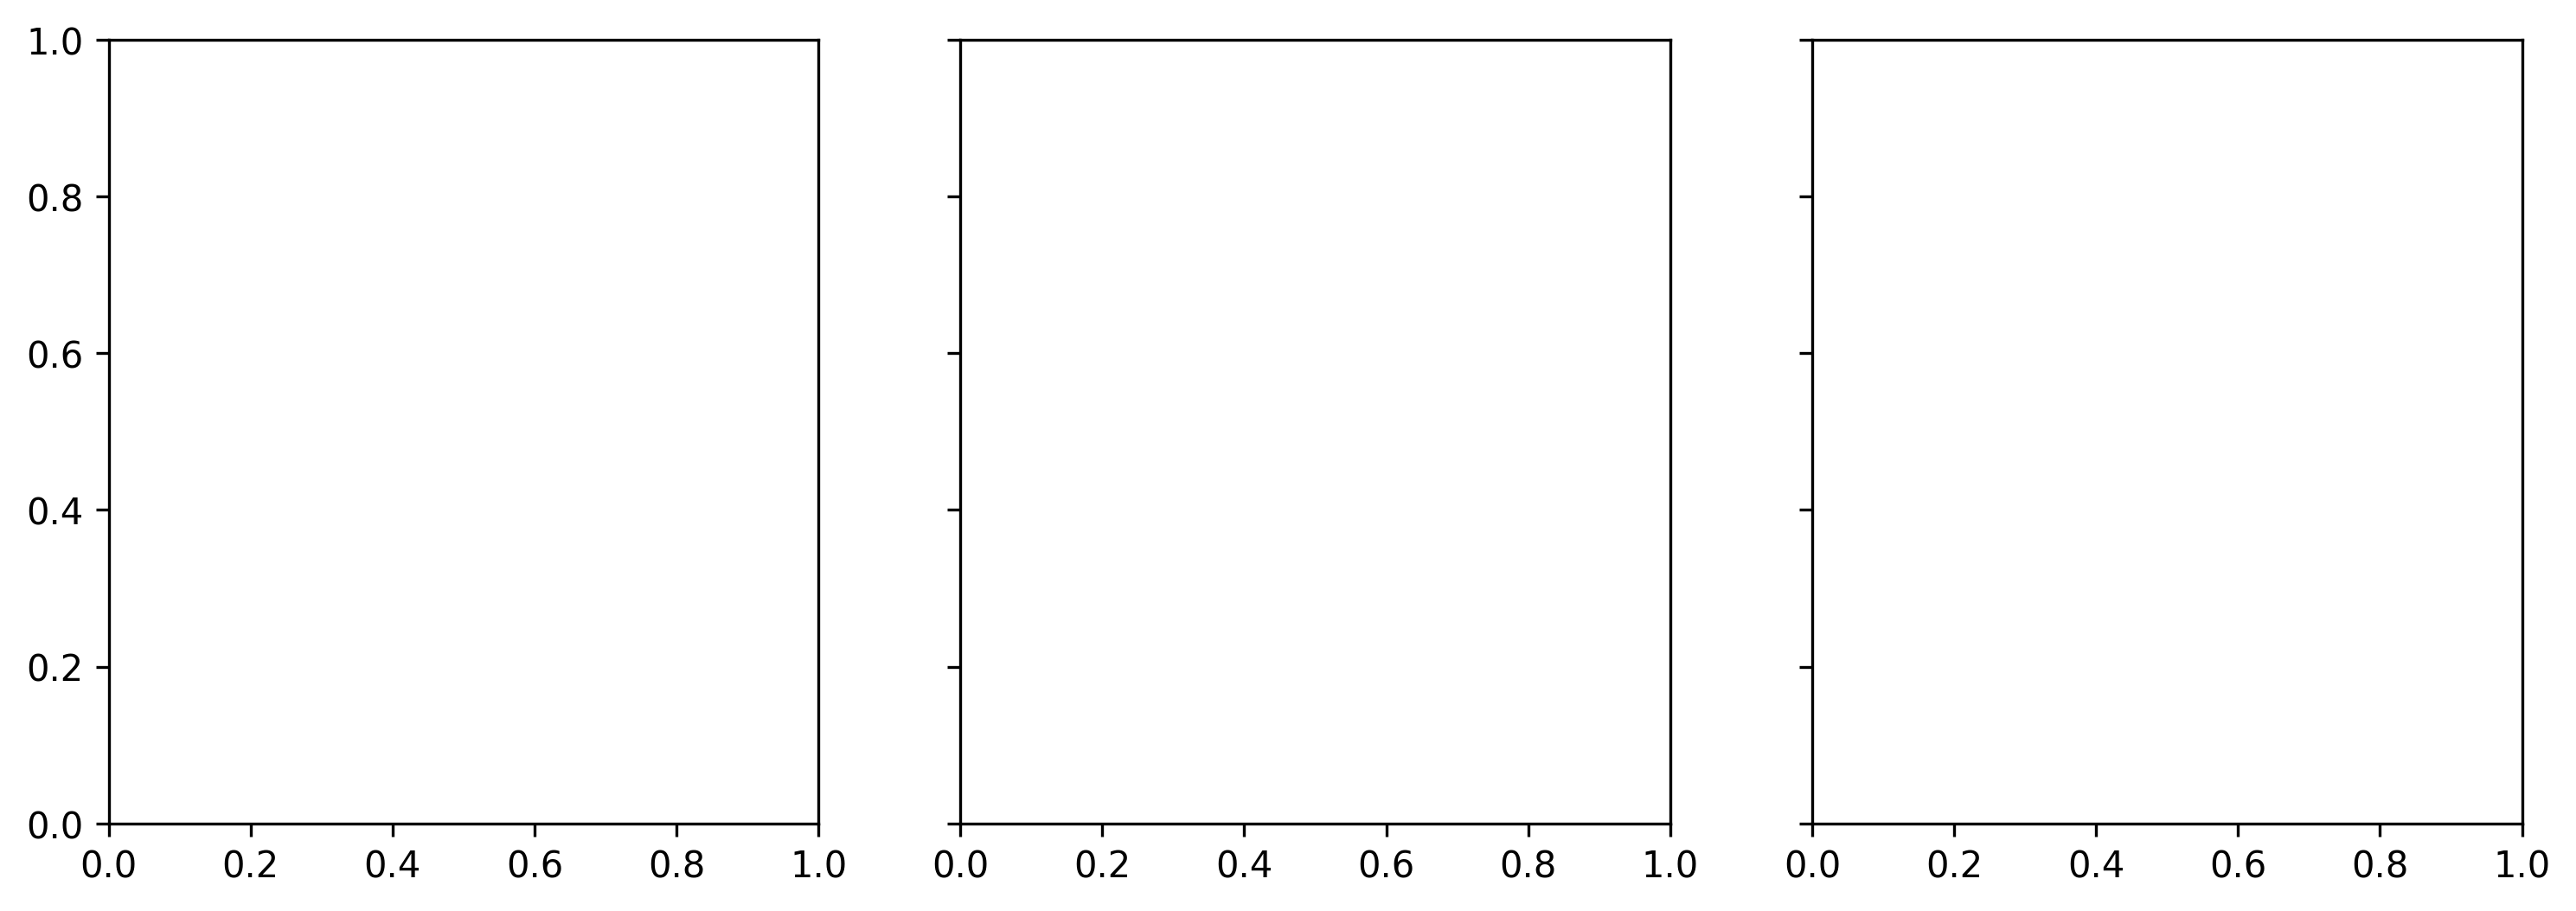

In [5]:
import numpy as np

nrel_color_dict = ['#0077C8', #darkblue
                '#00A9E0', #lightblue
                '#658D1B', #darkgreen
                '#84BD00', #lightgreen
                '#FFC72C', #yellow
                '#DE7C00', #orange
                '#5B6770', #darkgray
                '#C1C6C8'] #lightgray

tech_dict = {'pv':nrel_color_dict[4],
            'wind':nrel_color_dict[1],
            'batt':nrel_color_dict[3]}

scen_label_dict = {
    'StdScen19_Low_RE_Cost':'Low Wholesale Cost Projection',
    'StdScen19_Mid_Case':'Baseline Wholesale Cost Projection',
    'StdScen19_High_RE_Cost':'High Wholesale Cost Projection'}

xcol = "marginal_cost_mwh"
ycol = 'lifetime_cambium_total_value'#"lifetime_co2_rate_avg"
zcol = "capacity_factor"

df = Viz.gdf.copy()
sns.set_style()
fig, axs = plt.subplots(figsize=(12,4), ncols=3, sharey=True, dpi=300)

for i, s in enumerate(['StdScen19_Low_RE_Cost', 'StdScen19_Mid_Case', 'StdScen19_High_RE_Cost']):
    scenario_df = df.loc[df['scenario'] == s]
    
    colors = scenario_df['tech'].map(tech_dict)

    axs[i].scatter(
               x=scenario_df[xcol],
               y=scenario_df[ycol],
               s=50,
#                s=scenario_df[zcol] * 2,
               c=colors,
               alpha=0.3, edgecolor="k", linewidth=0.5)
    
    for tech in scenario_df['tech'].unique():
        tech_df = scenario_df.loc[scenario_df['tech'] == tech]
        m, b = np.polyfit(tech_df[xcol], tech_df[ycol], 1)
        axs[i].plot(tech_df[xcol], m*tech_df[xcol] + b,
                    c=tech_dict[tech])

    
    if i == 0:
        axs[i].set_ylabel('Lifetime Cumulative \n Grid Value')
            
    axs[i].set_xlabel('Marginal Cost ($/MWh)')
    axs[i].set_xlim(0, 50)
    axs[i].set_ylim(1 * 1e8, 4.5 * 1e8)
    
    axs[i].set_title(scen_label_dict[s])

sns.despine()
plt.tight_layout()


In [ ]:
df[['marginal_cost_mwh','lifetime_co2_rate_avg','tech']]